# HW1

## Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MOM. 

The dataset in class is about rainfall. However, the dataset of temperatures intrigued us, and we are curious about how finding the most likely parameters for the probability density function (PDF) using the **Method of Moments (MOM)** will perform.

### 1. Dataset - Monthly temperature around Aomori City from 1882 to 2020
https://www.kaggle.com/datasets/akioonodera/monthly-temperature-of-aomori-city/data

The dataset monthly_temperature_aomori_city.csv contains Japan Meteorological Agency temperature data around Aomori City, Aomori Prefecture, Japan from January 1882 to December 2019. 

Let's peek at our data first and plot them with histogram.

In [2]:
import pandas as pd
df = pd.read_csv('./monthly_temperature_aomori_city.csv', header = 0)
df

,year,month,temperature
0,1882,1,-0.4
1,1882,2,-0.6
2,1882,3,1.2
3,1882,4,8.9
4,1882,5,12.1
...,...,...,...
1663,2020,8,25.2
1664,2020,9,21.3
1665,2020,10,13.7
1666,2020,11,8.0


- Rearranged data with months as the index of the columns and years ranging from 1880 to 2022 as the rows, and convert Celsius to Fahrenheit

In [3]:
import pandas as pd

# Assuming df is your DataFrame containing temperature data

# Pivot the DataFrame
pivoted_df = df.pivot(index='year', columns='month', values='temperature')

# Reindex the DataFrame to fill any missing years
pivoted_df = pivoted_df.reindex(range(1882, 2021))

# Optional: Rename the columns to match the month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivoted_df.columns = month_names

# Convert Celsius to Fahrenheit
pivoted_df = pivoted_df * 9/5 + 32
print(pivoted_df)


        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
year                                                                         
1882  31.28  30.92  34.16  48.02  53.78  61.88  69.98  74.66  65.30  53.96   
1883  26.06  23.90  30.38  41.36  50.90  62.06  71.78  72.50  64.58  55.40   
1884  25.70  26.60  30.56  41.72  52.34  60.08  69.98  69.98  64.94  51.08   
1885  23.90  25.52  31.10  41.54  50.90  61.34  65.12  74.12  66.38  54.50   
1886  26.42  24.98  32.90  46.94  53.96  63.50  72.32  76.64  69.44  55.22   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2016  30.56  31.82  39.20  48.56  59.72  63.32  70.70  76.10  69.26  54.86   
2017  31.28  32.36  36.68  49.46  59.18  62.42  75.20  71.60  66.38  54.86   
2018  30.38  28.58  40.28  49.28  57.56  64.04  72.68  73.04  68.00  57.56   
2019  30.92  32.00  38.84  47.30  60.44  64.58  71.78  76.64  70.16  59.18   
2020  33.62  34.16  41.18  46.04  57.92  66.74  70.16  77.36  70

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

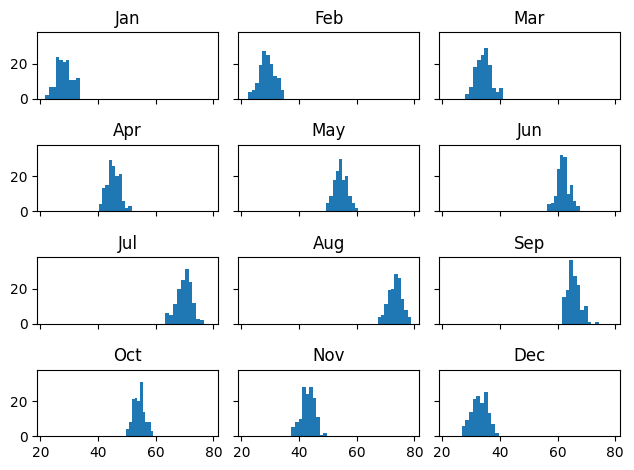

In [5]:
_ = pivoted_df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

plt.show()

Observations:

- The value of data is between 30 to 35, measuring the temperature
- The data is continuous

All the curves look like **Gaussians**, so we decided to use the Gaussian distribution. <br>
The two parameters we have to find is **mean $\mu$** and **standard deviation $\sigma$**.

![Gaussian Distribution](https://latex.codecogs.com/svg.image?%5Cdpi%7B120%7D%20f%28x%29%20%3D%20%5Cfrac%7B1%7D%7B%5Csigma%20%5Csqrt%7B2%5Cpi%7D%7D%20%5Ccdot%20e%5E%7B-%5Cfrac%7B%28x%20-%20%5Cmu%29%5E2%7D%7B2%5Csigma%5E2%7D%7D)


### 2. Data Cleansing 

Sometimes, the data contains NA values, which require preprocessing and cleansing before analysis. One method to handle NA values is to fill them in with the average of the available values.

We are fortunate that the data we receive has no missing values. However, if there are missing values, we can address them with the following method. <br>
The code fills NA values in January with the mean temperature of January.

In [6]:
pivoted_df.fillna(value={'Jan': pivoted_df.Jan.mean()}, inplace=True)
pivoted_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1882,31.28,30.92,34.16,48.02,53.78,61.88,69.98,74.66,65.30,53.96,38.84,28.76
1883,26.06,23.90,30.38,41.36,50.90,62.06,71.78,72.50,64.58,55.40,40.46,31.10
1884,25.70,26.60,30.56,41.72,52.34,60.08,69.98,69.98,64.94,51.08,37.40,27.32
1885,23.90,25.52,31.10,41.54,50.90,61.34,65.12,74.12,66.38,54.50,43.52,34.88
1886,26.42,24.98,32.90,46.94,53.96,63.50,72.32,76.64,69.44,55.22,42.98,31.64
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,30.56,31.82,39.20,48.56,59.72,63.32,70.70,76.10,69.26,54.86,41.00,35.60
2017,31.28,32.36,36.68,49.46,59.18,62.42,75.20,71.60,66.38,54.86,43.88,32.36
2018,30.38,28.58,40.28,49.28,57.56,64.04,72.68,73.04,68.00,57.56,46.94,34.16


### 3. Method of Moments

The **method of moments** simply assigns the **empirical mean** and **variance** to their **theoretical counterparts**, so that we can ***solve for the parameters*** of the Gaussian!

- First, calculate the **means** and **variances** *month by month* :

In [7]:
pivoted_df_mean = pivoted_df.mean()
pivoted_df_var = pivoted_df.var()

In [8]:
from math import sqrt
mu_mom = pivoted_df_mean
sigma_mom = pivoted_df_var.apply(sqrt)

mu_mom, sigma_mom

(Jan    28.181151
 Feb    28.864892
 Mar    34.306331
 Apr    45.325180
 May    54.514245
 Jun    61.999137
 Jul    69.811655
 Aug    73.352086
 Sep    65.674245
 Oct    54.207338
 Nov    43.136691
 Dec    32.986763
 dtype: float64,
 Jan    2.686904
 Feb    2.694769
 Mar    2.650287
 Apr    2.260690
 May    2.178084
 Jun    2.141612
 Jul    2.677490
 Aug    2.383795
 Sep    2.217291
 Oct    1.929710
 Nov    2.309890
 Dec    2.714600
 dtype: float64)

- Second, use the `norm.pdf` function in `scipy.stats.distributions` to plot the distributions implied by the calculated means and sigmas. 

Plot the temperatures for January from the year 1880 to 2022 as an example, and add the line of Gaussian distributions implied by the calculated mean and standard deviation to see if it matches the data.

C:\Users\jihui\AppData\Local\Temp\ipykernel_11880\1584593764.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(np.linspace(10, 40), norm.pdf(np.linspace(10, 40), mu_mom[0], sigma_mom[0]))


Text(0.5, 1.0, 'Jan temperature')

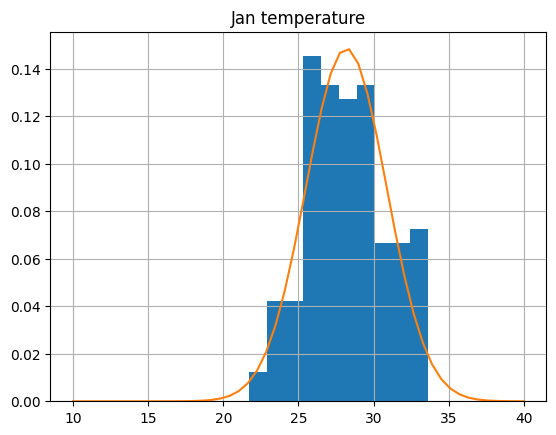

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import norm

pivoted_df.Jan.hist(density=True, bins=10)
plt.plot(np.linspace(10, 40), norm.pdf(np.linspace(10, 40), mu_mom[0], sigma_mom[0]))
plt.title("Jan temperature")

The model fits not bad for January.

- Looping over all months now, create a grid of plots for the distribution of temperature, using the Gaussian distribution.

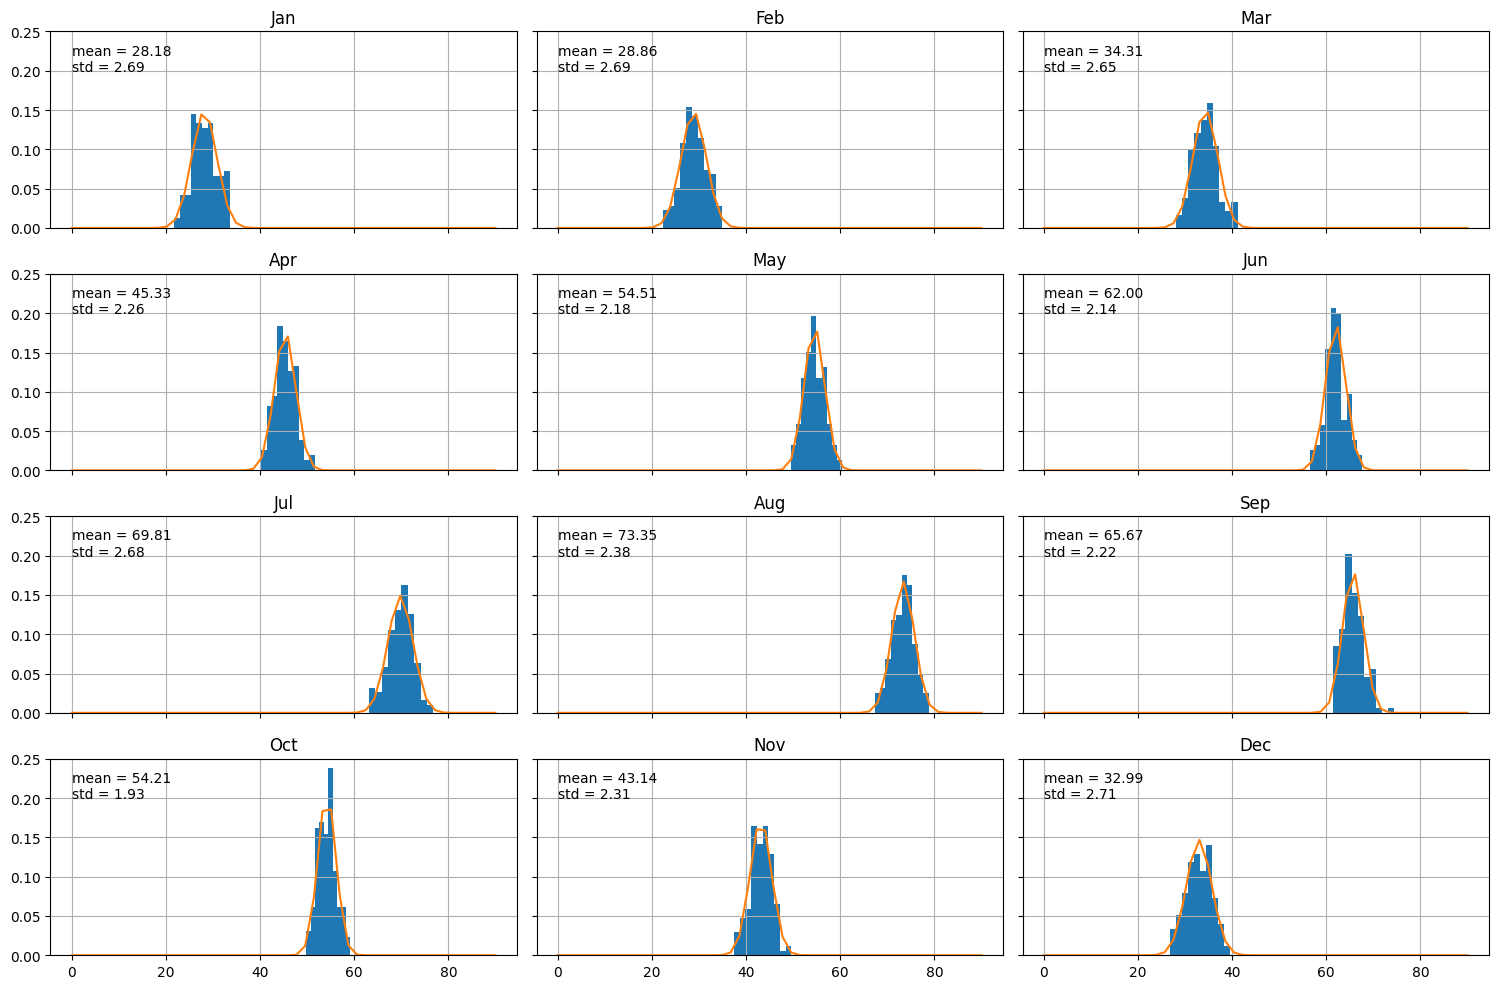

In [10]:
import numpy as np
%matplotlib inline

axs = pivoted_df.hist(density=True, figsize=(15, 10), sharex=True, sharey=True, bins=10, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(np.linspace(0, 90), norm.pdf(np.linspace(0, 90), mu_mom[m], sigma_mom[m]))
    
    # Annotate with parameter estimates
    label = 'mean = {0:.2f}\nstd = {1:.2f}'.format(mu_mom[m], sigma_mom[m])
    ax.annotate(label, xy=(0, 0.2))
    
plt.tight_layout()

### 4. Conclusion

The above is finding the most likely parameters for our PDF using the method of moments (MOM). Though the models are not perfectly fitted to the data, which is normal because perfect models do not exist, the models we produce using parameters calculated by MOM are aligned with the data.

# HW2

## Build a generative model allowing you to actually roll your gaussian-loaded die and generate random variates. Then, generate 100 random variates from it. Plot their histogram. How close does it match the theoretical histogram? Evaluate the error.


### Description

To build a **generative model** for rolling a Gaussian-loaded die and generate random variates, we use the `numpy.random.choice` function to sample from the discrete Gaussian distribution. Then, we can generate 100 random variates and plot their histogram to compare with the theoretical histogram.

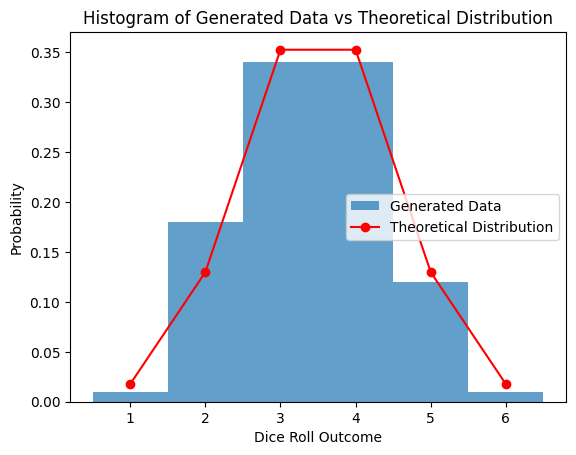

Total absolute error between theoretical and observed counts: 10.050353965758095


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Set seed for reproducibility
np.random.seed(42)

# Define the parameters
n = np.arange(1, 7)
mean = 3.5

# Generate the Gaussian-loaded die probabilities
gaussian_dice_probs = stats.norm.pdf(n, mean)

# Normalize the probabilities
gaussian_dice_probs /= np.sum(gaussian_dice_probs)

# Generate 100 random variates
random_variates = np.random.choice(n, size=100, p=gaussian_dice_probs)

# Plot the histogram
plt.hist(random_variates, bins=np.arange(1, 8), align='left', density=True, alpha=0.7, label='Generated Data')
plt.plot(n, gaussian_dice_probs, marker='o', linestyle='-', color='r', label='Theoretical Distribution')
plt.title('Histogram of Generated Data vs Theoretical Distribution')
plt.xlabel('Dice Roll Outcome')
plt.ylabel('Probability')
plt.xticks(n)
plt.legend()
plt.show()

# Calculate the error
theoretical_counts = gaussian_dice_probs * 100  # 100 samples
observed_counts, _ = np.histogram(random_variates, bins=np.arange(1, 8), density=False)
error = np.sum(np.abs(theoretical_counts - observed_counts))
print("Total absolute error between theoretical and observed counts:", error)



- The theoretical distribution represents the ideal probabilities of each outcome of the loaded die based on a Gaussian distribution.
- The observed counts are the actual frequencies of each outcome obtained from rolling the loaded die 100 times.

### Conclusion

When we compare the observed counts to the theoretical counts, we find that, on average, each outcome deviates from its expected value by approximately 10.05. This indicates that there are differences between the generated data and the theoretical distribution, which could be due to random chance or other factors affecting the sampling process.

In summary, a total absolute error of 10.05 suggests that there is some discrepancy between the generated data and the theoretical distribution, but it's not overwhelmingly large, indicating that the generative model is reasonably accurate in representing the loaded die's behavior.


# HW3

## Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MLE. 
 

Use the same dataset as the HW1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 1. The histogram of the dataset

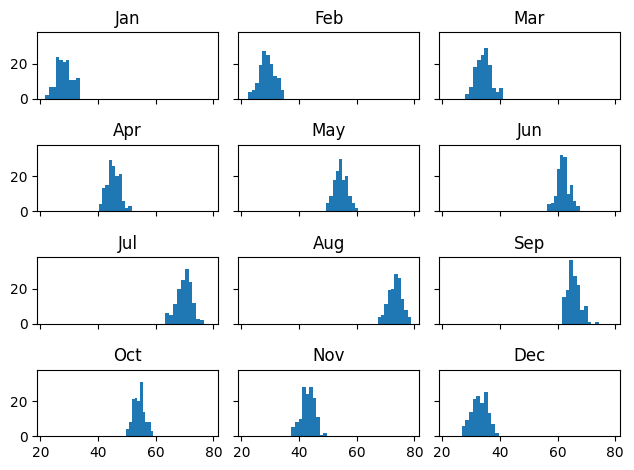

In [13]:
_ = pivoted_df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

plt.show()

### 2. To find the most likely parameters for the probability density function (PDF) using Maximum Likelihood Estimation (MLE), we have chosen the Gaussian distribution.

We will determine the variances and means. We are going to use the data from January as the representative dataset to compare the usage of the Method of Moments (MOM) and MLE in building models.

In [14]:
from scipy.optimize import newton
import numpy as np

def log_likelihood_derivative(params, data):
    mu, sigma = params
    n = len(data)
    dmu = np.sum(data - mu) / n
    dsigma = np.sum((data - mu) ** 2 - sigma ** 2) / n / sigma
    return np.array([dmu, dsigma])

def mle_normal_params(data, x0=(0, 1)):
    params_mle = newton(log_likelihood_derivative, x0, args=(data,))
    return params_mle

# Estimate the mean and standard deviation using a custom maximum likelihood estimation function
# Use the data of January to do the comparison
n = 'Jan'
mu_mle, sigma_mle = mle_normal_params(pivoted_df[n])
print("January mean estimated by MLE：", mu_mle)
print("January standard deviation estimated by MLE：", sigma_mle)

# select [0] as the January
print("\nJanuary mean estimated by MOM：", mu_mom[0])
print("January standard deviation estimated by MOM：", sigma_mom[0])

January mean estimated by MLE： 28.18115107913669
January standard deviation estimated by MLE： 2.677221548878503

January mean estimated by MOM： 28.181151079136693
January standard deviation estimated by MOM： 2.686904117730899


C:\Users\jihui\AppData\Local\Temp\ipykernel_11880\503050685.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nJanuary mean estimated by MOM：", mu_mom[0])
C:\Users\jihui\AppData\Local\Temp\ipykernel_11880\503050685.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("January standard deviation estimated by MOM：", sigma_mom[0])


- Both the mean and standard deviation estimated by MLE and MOM for January are similar. Let's see how they fit with the data next.

### 3. Draw both models on the histogram to see how they fit with the data.

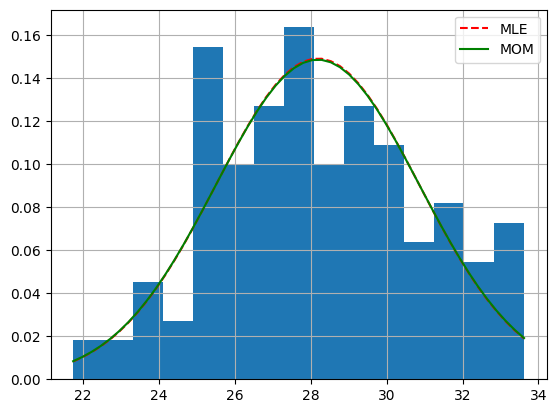

In [15]:
from scipy.stats.distributions import norm
pivoted_df[n].hist(density=True, bins = 15)
x = np.linspace(pivoted_df[n].min(), pivoted_df[n].max())
plt.plot(x, norm.pdf(x, loc = mu_mle, scale = sigma_mle), 'r--', label = 'MLE')
plt.plot(x, norm.pdf(x, loc = mu_mom[n], scale = sigma_mom[n]), 'g-', label = 'MOM')
plt.legend()

In [16]:
!pip3 install pymc arviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


<Axes: >

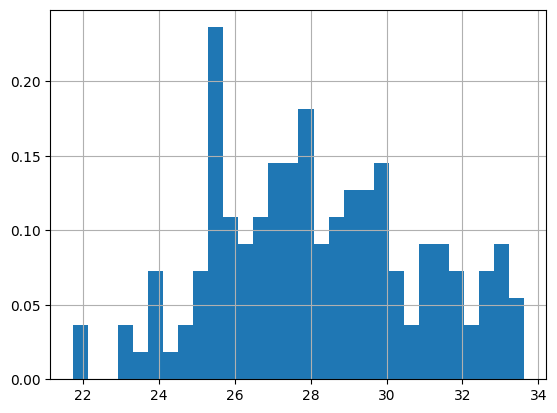

In [17]:
pivoted_df.Jan.hist(density=True, bins=30)

In [18]:
import pymc as pm

with pm.Model() as rainfall_model:
    ualpha = pm.Uniform('ualpha', lower=0, upper=90)
    ubeta = pm.Uniform('ubeta', lower=0, upper=90)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [19]:
with rainfall_model:
    Jan_like = pm.Gamma('jan_like', alpha=ualpha, beta=ubeta, observed=pivoted_df.Jan)

In [20]:
import pymc as pm
import numpy as np

RANDOM_SEED = np.random.seed(123)

with rainfall_model: 
    rainfall_trace = pm.sample(1000, random_seed=RANDOM_SEED, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 96 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 75 divergences after tuning. Increase `target_accept` or reparameterize.


array([<Axes: title={'center': 'ualpha'}>,
       <Axes: title={'center': 'ubeta'}>], dtype=object)

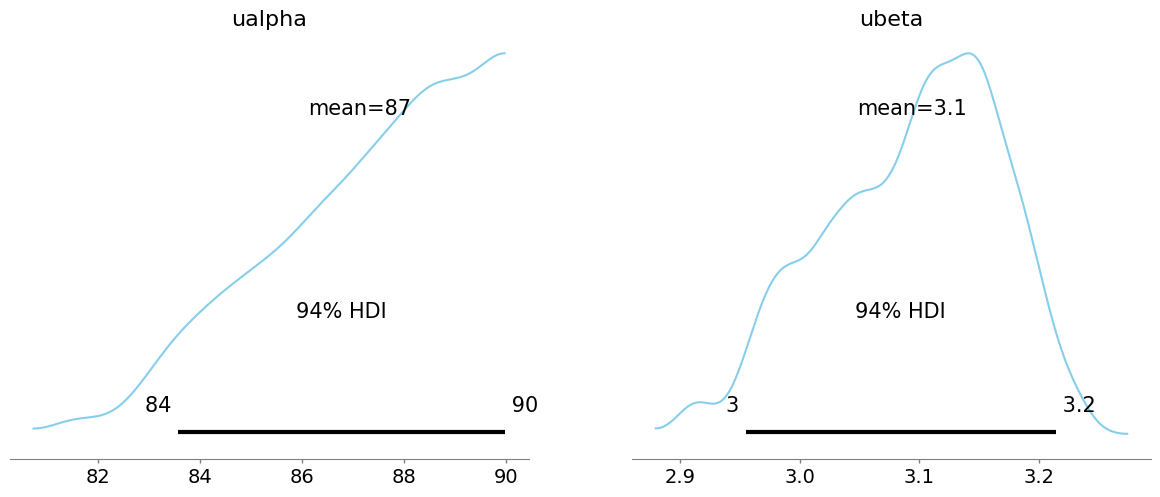

In [21]:
import arviz as az

az.plot_posterior(rainfall_trace, var_names=['ualpha', 'ubeta'], color='#87ceeb')

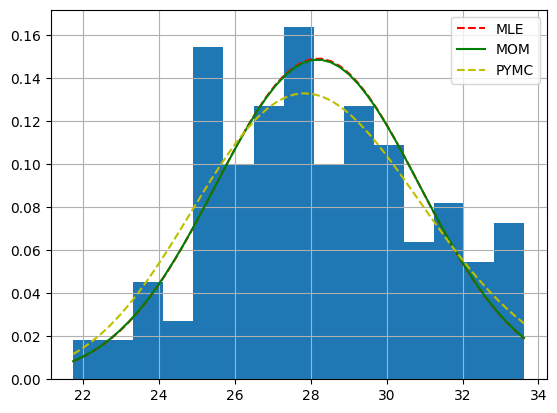

In [22]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = rainfall_trace.posterior['ualpha'].mean().values
ubeta_posterior_mean = rainfall_trace.posterior['ubeta'].mean().values

pivoted_df.Jan.hist(density=True, bins = 15)
x = np.linspace(pivoted_df[n].min(), pivoted_df[n].max())
plt.plot(x, norm.pdf(x, loc = mu_mle, scale = sigma_mle), 'r--', label = 'MLE')
plt.plot(x, norm.pdf(x, loc = mu_mom[n], scale = sigma_mom[n]), 'g-', label = 'MOM')
plt.plot(x, gamma.pdf(x, ualpha_posterior_mean, scale=1/ubeta_posterior_mean),'y--',label='PYMC')
plt.legend()


### 4. Conclusion

Upon examining the overlapped models **MLE** and **MOM**, that within the 27 to 29 interval, which signifies the model's apex, the **MLE** curve surpasses the **MOM** curve in height and exhibits superior data congruence. Concurrently, the Bayesian statistical approach, as delineated by the **PYMC** curve, closely mirrors the **MLE** and **MOM** methodologies, with marginal variances in certain segments. Given the Bayesian method's capacity to gauge parameter uncertainty and its commendable fit across the data spectrum, it remains a contender in model selection. Nevertheless, at the peak's precincts, the MLE methodology appears to offer the most precise fit. Thus, after deliberating on fit quality against model intricacy, **the decision has been made to adopt the MLE method for model construction. While the MOM method and Bayesian statistics (PYMC) perform comparably, the MLE demonstrates superior performance in critical intervals.**